<a href="https://colab.research.google.com/github/tangQAQ/LSTM_training/blob/main/LSTM_2l_5u_5e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, TimeDistributed
from keras.callbacks import EarlyStopping
from google.colab import drive
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import warnings 

warnings.filterwarnings('ignore')

drive.mount('/content/gdrive')
train_data = pd.read_csv("/content/gdrive/MyDrive/GSPC_train.csv")
train_data = train_data.drop(['Date'], axis= 1)
train_data = train_data.apply(lambda x: pd.to_numeric(x.str.replace(',',''), errors='coerce')).fillna(-1).astype('float32')

test_df = pd.read_csv("/content/gdrive/MyDrive/GSPC_train.csv")
test_data = test_df.copy()
test_data = test_data.drop(['Date'], axis= 1)
test_data_clean = test_data.apply(lambda x: pd.to_numeric(x.str.replace(',',''), errors='coerce')).fillna(-1).astype('float32')

total = pd.concat((train_data, test_data_clean), axis=0)

train_data_7 = total.copy()
train_data_15 = total.copy()
train_data_30 = total.copy()
train_data_7.shape, train_data_15.shape, train_data_30.shape

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


((47366, 6), (47366, 6), (47366, 6))

In [28]:
train_data

,Open,High,Low,Close,Adj Close,Volume
0,17.760000,17.760000,17.760000,17.760000,17.760000,-1.000000e+00
1,17.719999,17.719999,17.719999,17.719999,17.719999,-1.000000e+00
2,17.549999,17.549999,17.549999,17.549999,17.549999,-1.000000e+00
3,17.660000,17.660000,17.660000,17.660000,17.660000,-1.000000e+00
4,17.500000,17.500000,17.500000,17.500000,17.500000,-1.000000e+00
...,...,...,...,...,...,...
23678,4494.169922,4503.939941,4450.040039,4481.149902,4481.149902,4.986830e+09
23679,4474.649902,4521.160156,4450.299805,4500.209961,4500.209961,4.821490e+09
23680,4494.149902,4520.410156,4474.600098,4488.279785,4488.279785,4.083200e+09
23681,4462.640137,4464.350098,4408.379883,4412.529785,4412.529785,4.266290e+09


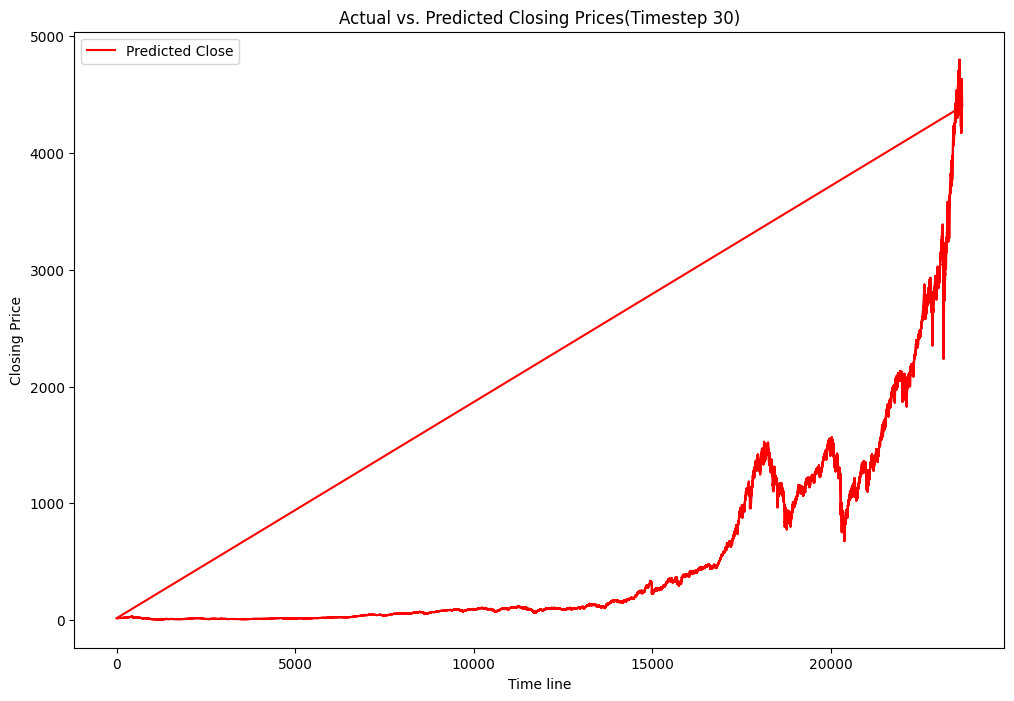

In [29]:
from numpy.ma import left_shift
import matplotlib.ticker as ticker

result = total.iloc[:, 3:4]

plt.figure(figsize=(12, 8))
plt.title('Actual vs. Predicted Closing Prices(Timestep 30)')
plt.xlabel('Time line')
plt.ylabel('Closing Price')
plt.plot(result, label='Predicted Close', color='r')
plt.legend()
plt.show()

In [30]:
def data_split(data, slice_size):
  size = int(len(data) * slice_size)
  train = data[:size]
  val = data[size:]
  return train, val

In [31]:
def create_sequences(data, sequences):
    X = []
    y = []
    for i in range(sequences, len(data)):
        X.append(data[i-sequences:i, :])
        y.append(data[i, 0])
    X = np.array(X)
    y = np.array(y)
    return X, y

In [32]:
sc = MinMaxScaler(feature_range=(0,1))

train, val = data_split(train_data_7, 0.8)

sequences_7 = 7
train_data_scaled = sc.fit_transform(train.iloc[:, 3:4])
val_data_scaled = sc.transform(val.iloc[:, 3:4])
#print(train_data_scaled.max(), train_data_scaled.min(), val_data_scaled.max(), val_data_scaled.min())

X_train_7, y_train_7 = create_sequences(train_data_scaled, sequences_7)
X_val_7, y_val_7 = create_sequences(val_data_scaled, sequences_7)
#X_train, y_train = create_sequences(train.iloc[:, 3:4].values, sequences)
#X_val, y_val = create_sequences(val.iloc[:, 3:4].values, sequences)
X_train_7.shape, y_train_7.shape, X_val_7.shape, y_val_7.shape

((37885, 7, 1), (37885,), (9467, 7, 1), (9467,))

In [33]:
sc = MinMaxScaler(feature_range=(0,1))

train, val = data_split(train_data_15, 0.8)

sequences_15 = 15
train_data_scaled = sc.fit_transform(train.iloc[:, 3:4])
val_data_scaled = sc.transform(val.iloc[:, 3:4])
#print(train_data_scaled.max(), train_data_scaled.min(), val_data_scaled.max(), val_data_scaled.min())

X_train_15, y_train_15 = create_sequences(train_data_scaled, sequences_15)
X_val_15, y_val_15 = create_sequences(val_data_scaled, sequences_15)
#X_train, y_train = create_sequences(train.iloc[:, 3:4].values, sequences)
#X_val, y_val = create_sequences(val.iloc[:, 3:4].values, sequences)
X_train_15.shape, y_train_15.shape, X_val_15.shape, y_val_15.shape

((37877, 15, 1), (37877,), (9459, 15, 1), (9459,))

In [34]:
sc = MinMaxScaler(feature_range=(0,1))

train, val = data_split(train_data_30, 0.8)

sequences_30 = 30
train_data_scaled = sc.fit_transform(train.iloc[:, 3:4])
val_data_scaled = sc.transform(val.iloc[:, 3:4])
#print(train_data_scaled.max(), train_data_scaled.min(), val_data_scaled.max(), val_data_scaled.min())

X_train_30, y_train_30 = create_sequences(train_data_scaled, sequences_30)
X_val_30, y_val_30 = create_sequences(val_data_scaled, sequences_30)
#X_train, y_train = create_sequences(train.iloc[:, 3:4].values, sequences)
#X_val, y_val = create_sequences(val.iloc[:, 3:4].values, sequences)
X_train_30.shape, y_train_30.shape, X_val_30.shape, y_val_30.shape

((37862, 30, 1), (37862,), (9444, 30, 1), (9444,))

In [35]:
model_7 = Sequential()
model_7.add(LSTM(units=5, return_sequences=True, dropout=0.2, input_shape=(X_train_7.shape[1], X_train_7.shape[2])))
model_7.add(LSTM(units=5, return_sequences=False, dropout=0.2))
model_7.add(Dense(units=1))

model_7.compile(optimizer='Adam', loss='mse', metrics='Accuracy')
#callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_7 = model_7.fit(X_train_7, y_train_7, validation_data=(X_val_7, y_val_7), epochs=5, batch_size=32)#, callbacks = [callback])

Epoch 1/5
1184/1184 [==============================] - 14s 8ms/step - loss: 0.0028 - Accuracy: 7.9187e-05 - val_loss: 4.0679e-04 - val_Accuracy: 1.0563e-04
Epoch 2/5
1184/1184 [==============================] - 9s 7ms/step - loss: 0.0011 - Accuracy: 7.9187e-05 - val_loss: 2.4858e-04 - val_Accuracy: 1.0563e-04
Epoch 3/5
1184/1184 [==============================] - 9s 8ms/step - loss: 0.0010 - Accuracy: 7.9187e-05 - val_loss: 7.5566e-04 - val_Accuracy: 1.0563e-04
Epoch 4/5
1184/1184 [==============================] - 9s 8ms/step - loss: 8.1189e-04 - Accuracy: 7.9187e-05 - val_loss: 0.0014 - val_Accuracy: 1.0563e-04
Epoch 5/5
1184/1184 [==============================] - 8s 7ms/step - loss: 5.7265e-04 - Accuracy: 7.9187e-05 - val_loss: 0.0030 - val_Accuracy: 1.0563e-04


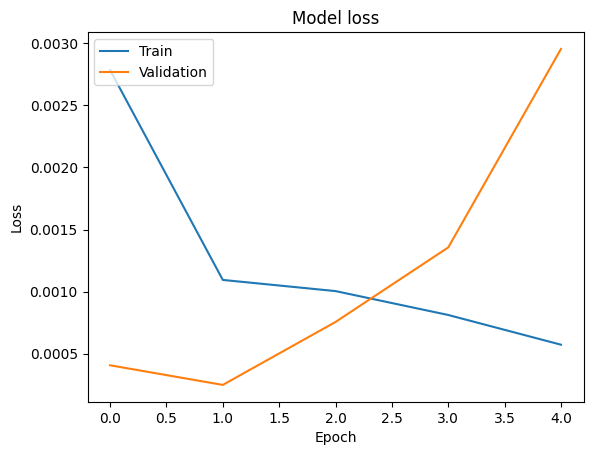

In [36]:
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [37]:
model_15 = Sequential()
model_15.add(LSTM(units=5, return_sequences=True, dropout=0.2, input_shape=(X_train_15.shape[1], X_train_15.shape[2])))
model_15.add(LSTM(units=5, return_sequences=False, dropout=0.2))
model_15.add(Dense(units=1))

model_15.compile(optimizer='Adam', loss='mse', metrics='Accuracy')
#callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_15 = model_15.fit(X_train_15, y_train_15, validation_data=(X_val_15, y_val_15), epochs=5, batch_size=32)#, callbacks = [callback])

Epoch 1/5
1184/1184 [==============================] - 15s 8ms/step - loss: 0.0012 - Accuracy: 7.9204e-05 - val_loss: 2.2813e-04 - val_Accuracy: 1.0572e-04
Epoch 2/5
1184/1184 [==============================] - 9s 8ms/step - loss: 6.5221e-04 - Accuracy: 7.9204e-05 - val_loss: 3.1259e-04 - val_Accuracy: 1.0572e-04
Epoch 3/5
1184/1184 [==============================] - 10s 8ms/step - loss: 6.2925e-04 - Accuracy: 7.9204e-05 - val_loss: 4.9593e-04 - val_Accuracy: 1.0572e-04
Epoch 4/5
1184/1184 [==============================] - 9s 7ms/step - loss: 5.7245e-04 - Accuracy: 7.9204e-05 - val_loss: 4.1328e-04 - val_Accuracy: 1.0572e-04
Epoch 5/5
1184/1184 [==============================] - 9s 8ms/step - loss: 5.5815e-04 - Accuracy: 7.9204e-05 - val_loss: 6.3836e-04 - val_Accuracy: 1.0572e-04


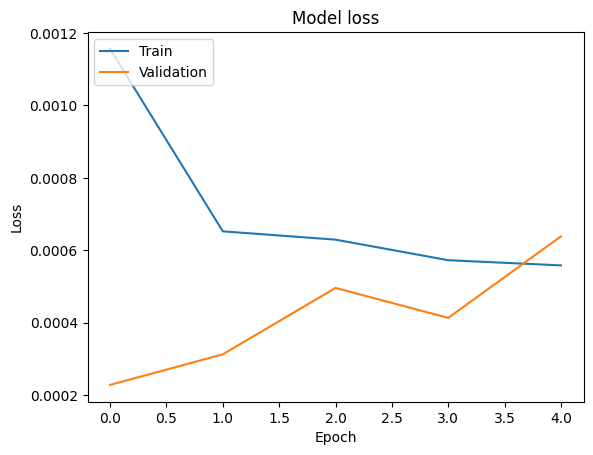

In [38]:
plt.plot(history_15.history['loss'])
plt.plot(history_15.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [39]:
model_30 = Sequential()
model_30.add(LSTM(units=5, return_sequences=True, dropout=0.2, input_shape=(X_train_30.shape[1], X_train_30.shape[2])))
model_30.add(LSTM(units=5, return_sequences=False, dropout=0.2))
model_30.add(Dense(units=1))

model_30.compile(optimizer='Adam', loss='mse', metrics='Accuracy')
#callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_30 = model_30.fit(X_train_30, y_train_30, validation_data=(X_val_30, y_val_30), epochs=5, batch_size=32)#, callbacks = [callback])

Epoch 1/5
1184/1184 [==============================] - 15s 10ms/step - loss: 0.0015 - Accuracy: 7.9235e-05 - val_loss: 4.6043e-04 - val_Accuracy: 1.0589e-04
Epoch 2/5
1184/1184 [==============================] - 10s 9ms/step - loss: 6.0189e-04 - Accuracy: 7.9235e-05 - val_loss: 2.2985e-04 - val_Accuracy: 1.0589e-04
Epoch 3/5
1184/1184 [==============================] - 10s 8ms/step - loss: 5.0647e-04 - Accuracy: 7.9235e-05 - val_loss: 8.2545e-04 - val_Accuracy: 1.0589e-04
Epoch 4/5
1184/1184 [==============================] - 10s 8ms/step - loss: 4.3175e-04 - Accuracy: 7.9235e-05 - val_loss: 0.0022 - val_Accuracy: 1.0589e-04
Epoch 5/5
1184/1184 [==============================] - 11s 9ms/step - loss: 3.6101e-04 - Accuracy: 7.9235e-05 - val_loss: 0.0075 - val_Accuracy: 1.0589e-04


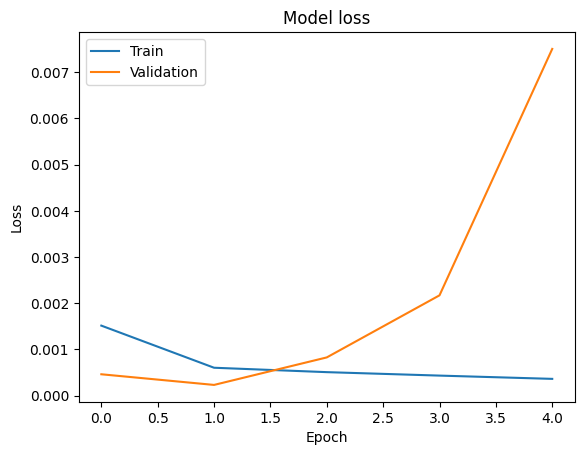

In [40]:
plt.plot(history_30.history['loss'])
plt.plot(history_30.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [41]:
test_data_7 = pd.read_csv("/content/gdrive/MyDrive/GSPC_test_7.csv")

test_data_7 = test_data_7.drop(['Date'], axis= 1)
test_data_clean_7 = test_data_7.apply(lambda x: pd.to_numeric(x.str.replace(',',''), errors='coerce')).fillna(-1).astype('float32')

preds_7 = list()
sc2 = MinMaxScaler(feature_range=(0,1))
test_data_7 = test_data_clean_7.iloc[:, 3:4]
print(test_data_7.shape)

test_data_scaled = sc.transform(test_data_7)
X_test, y_test = create_sequences(test_data_scaled, sequences_7)
test_predictions = model_7.predict(X_test)
inverse_7 = sc.inverse_transform(test_predictions)

(20, 1)
1/1 [==============================] - 1s 640ms/step


In [42]:
Actual_data = pd.read_csv("/content/gdrive/MyDrive/GSPC_Actual.csv")

Actual_data = Actual_data.drop(['Date'], axis= 1)
Actual_data = Actual_data.apply(lambda x: pd.to_numeric(x.str.replace(',',''), errors='coerce')).fillna(-1).astype('float32')
Actual_Close = Actual_data['Close']

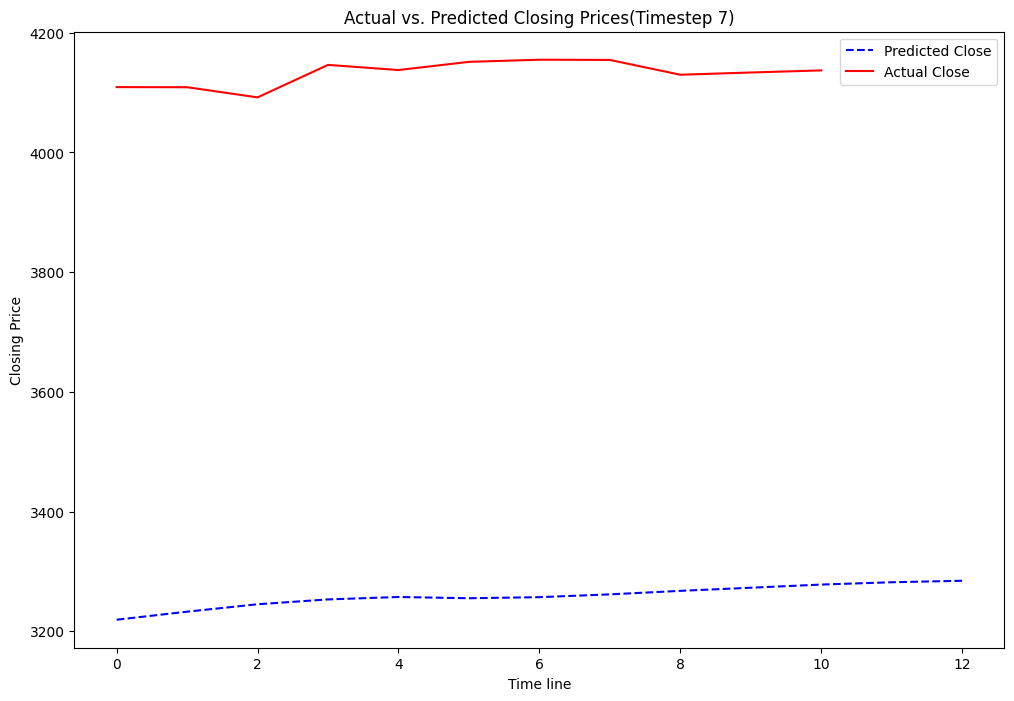

In [43]:
from numpy.ma import left_shift
import matplotlib.ticker as ticker

result = inverse_7
plt.figure(figsize=(12, 8))
plt.title('Actual vs. Predicted Closing Prices(Timestep 7)')
plt.xlabel('Time line')
plt.ylabel('Closing Price')
plt.plot(result, label='Predicted Close', color='b', linestyle='--')
plt.plot(Actual_Close, label='Actual Close', color='r')
ax= plt.gca()
plt.legend()
plt.show()

In [44]:
test_data_15 = pd.read_csv("/content/gdrive/MyDrive/GSPC_test_15.csv")

test_data_15 = test_data_15.drop(['Date'], axis= 1)
test_data_clean_15 = test_data_15.apply(lambda x: pd.to_numeric(x.str.replace(',',''), errors='coerce')).fillna(-1).astype('float32')

preds_15 = list()
sc2 = MinMaxScaler(feature_range=(0,1))
test_data_15 = test_data_clean_15.iloc[:, 3:4]

test_data_scaled = sc.transform(test_data_15)
X_test, y_test = create_sequences(test_data_scaled, sequences_15)
test_predictions = model_15.predict(X_test)
inverse_15 = sc.inverse_transform(test_predictions)

1/1 [==============================] - 1s 990ms/step


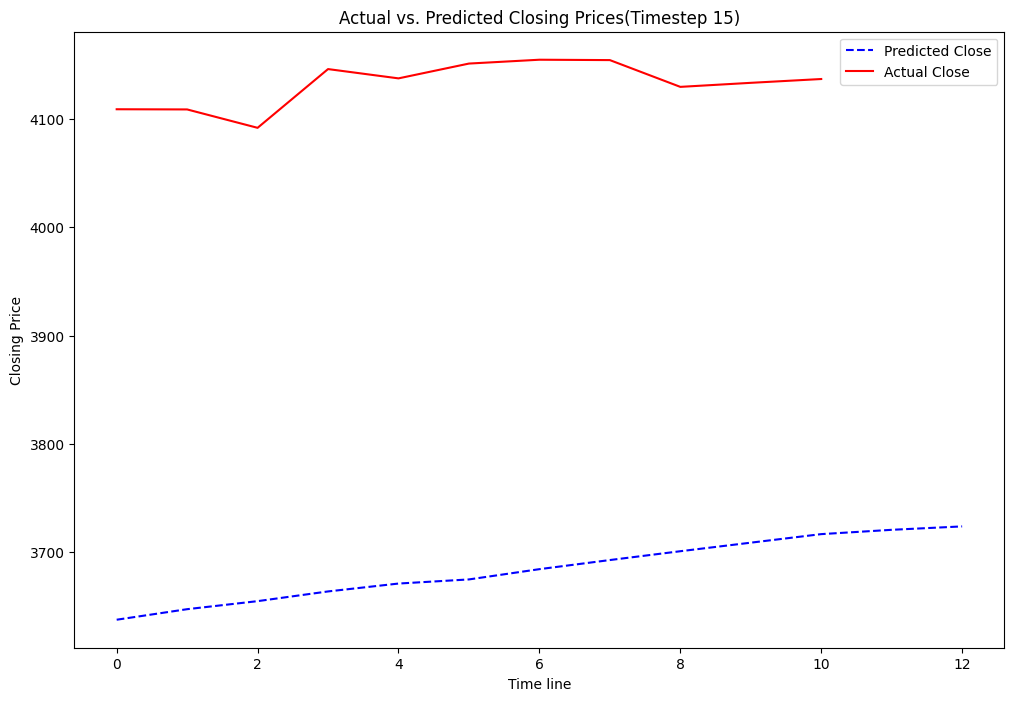

In [45]:
from numpy.ma import left_shift
import matplotlib.ticker as ticker

result = inverse_15
plt.figure(figsize=(12, 8))
plt.title('Actual vs. Predicted Closing Prices(Timestep 15)')
plt.xlabel('Time line')
plt.ylabel('Closing Price')
plt.plot(result, label='Predicted Close', color='b', linestyle='--')
plt.plot(Actual_Close, label='Actual Close', color='r')
ax= plt.gca()
plt.legend()
plt.show()

In [46]:
test_data_30 = pd.read_csv("/content/gdrive/MyDrive/GSPC_test_30.csv")

test_data_30 = test_data_30.drop(['Date'], axis= 1)
test_data_clean_30 = test_data_30.apply(lambda x: pd.to_numeric(x.str.replace(',',''), errors='coerce')).fillna(-1).astype('float32')

preds_30 = list()
sc2 = MinMaxScaler(feature_range=(0,1))
test_data_30 = test_data_clean_30.iloc[:, 3:4]

test_data_scaled = sc.transform(test_data_30)
X_test, y_test = create_sequences(test_data_scaled, sequences_30)
test_predictions = model_30.predict(X_test)
inverse_30 = sc.inverse_transform(test_predictions)

1/1 [==============================] - 1s 953ms/step


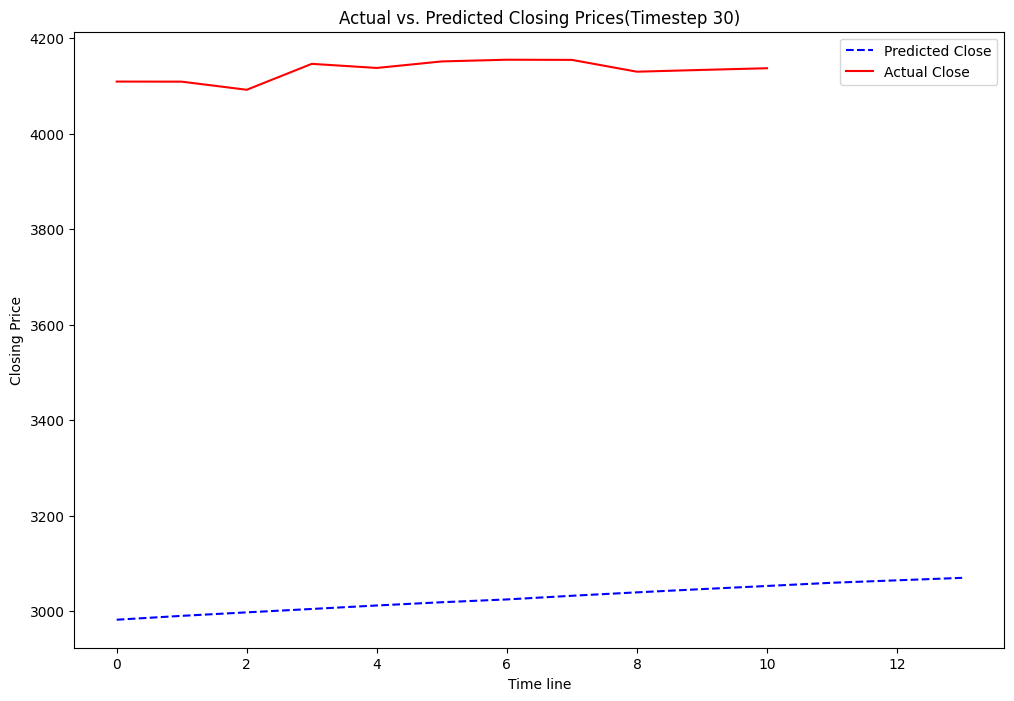

In [47]:
from numpy.ma import left_shift
import matplotlib.ticker as ticker

result = inverse_30
plt.figure(figsize=(12, 8))
plt.title('Actual vs. Predicted Closing Prices(Timestep 30)')
plt.xlabel('Time line')
plt.ylabel('Closing Price')
plt.plot(result, label='Predicted Close', color='b', linestyle='--')
plt.plot(Actual_Close, label='Actual Close', color='r')
ax= plt.gca()
plt.legend()
plt.show()